## Assignment 3 - Deadline: Oct 19, 2025, Sun 11pm

#### DSAI 510 Fall 2025

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.bogazici.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [1]:
# Run this cell first

import pandas as pd
import numpy as np

# Set the display option to show all rows scrolling with a slider
# pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if it asks, "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1 (10 pts)

(a) Load the Ames house dataset from the file **train.csv**.

(b) Display the records with sale price greater than 500000 USD and LotFrontage less than 150 feet. Show only these columns: **Id**, **LotFrontage** and **SalePrice**.

(c) Print the list of all possible distinct values for the column **SaleCondition** for the records where sale price is greater than 500000 USD and LotFrontage is less than 150 feet.

(d) Create an interactive scatter plot, as we did in class, of LotFrontage versus SalePrice, displaying only the records identified in the previous step. When hovering over the dots, the plot should display the **SaleCondition** in addition to **LotFrontage** and **SalePrice** information.



In [3]:
# Break your computations into multiple cells 
# part a)
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# part b)
print(df[(df['SalePrice'] > 500000) & (df['LotFrontage'] < 150)][['Id', 'LotFrontage', 'SalePrice']])

        Id  LotFrontage  SalePrice
178    179         63.0     501837
440    441        105.0     555000
691    692        104.0     755000
769    770         47.0     538000
803    804        107.0     582933
898    899        100.0     611657
1046  1047         85.0     556581
1169  1170        118.0     625000


In [8]:
# part c)
print(df[(df['SalePrice'] > 500000) & (df['LotFrontage'] < 150)]['SaleCondition'].unique())

['Partial' 'Normal']


In [12]:
# part d)
import plotly.express as px

fig = px.scatter(df[(df['SalePrice'] > 500000) & (df['LotFrontage'] < 150)], 
                 x='LotFrontage', 
                 y='SalePrice',
                 hover_data={'LotFrontage': True,
                            'SalePrice': True,
                            'SaleCondition': True},
                 title='LotFrontage vs SalePrice')

fig.show()

## Problem 2 (10 pts)

(a) Display the list of neighborhood names and 'mean sale price' for those neighborhoods for the records whose SaleCondition is 'Normal'.

(b) Display the list of neighborhood names and the difference "max sale price - mean sale price" for each neighborhood. (Here "-" is for subtraction.)

(c) Recreate the boxplot comparing Neighborhood to SalePrice that we made in class. This time, order the neighborhoods based on their medians in ascending order, from left to right. In other words, the neighborhood with the lowest SalePrice median should be on the far left.

In [15]:
# part a)
df[df['SaleCondition'] == 'Normal'].groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    188977.083333
Blueste    137500.000000
BrDale     107916.666667
BrkSide    125588.425926
ClearCr    220993.000000
CollgCr    193877.224806
Crawfor    204863.651163
Edwards    127803.048780
Gilbert    189392.812500
IDOTRR     108575.862069
MeadowV     98987.500000
Mitchel    155410.714286
NAmes      147533.550505
NPkVill    143031.250000
NWAmes     193799.296875
NoRidge    328219.135135
NridgHt    285046.666667
OldTown    133173.489362
SWISU      139788.636364
Sawyer     136976.611940
SawyerW    191505.600000
Somerst    217760.653061
StoneBr    264870.375000
Timber     238484.392857
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [16]:
# part b)
df.groupby('Neighborhood')['SalePrice'].agg(lambda x: x.max() - x.mean())

Neighborhood
Blmngtn     69690.117647
Blueste     13500.000000
BrDale      20506.250000
BrkSide     98665.948276
ClearCr    115434.571429
CollgCr    226904.226667
Crawfor    181875.274510
Edwards    191780.300000
Gilbert    184645.493671
IDOTRR      69376.216216
MeadowV     52823.529412
Mitchel    114729.877551
NAmes      199152.920000
NPkVill     12305.555556
NWAmes     110749.931507
NoRidge    419704.682927
NridgHt    295386.376623
OldTown    346774.699115
SWISU       57408.640000
Sawyer      53206.864865
SawyerW    133444.203390
Somerst    197620.162791
StoneBr    246082.000000
Timber     136252.552632
Veenker    146227.272727
Name: SalePrice, dtype: float64

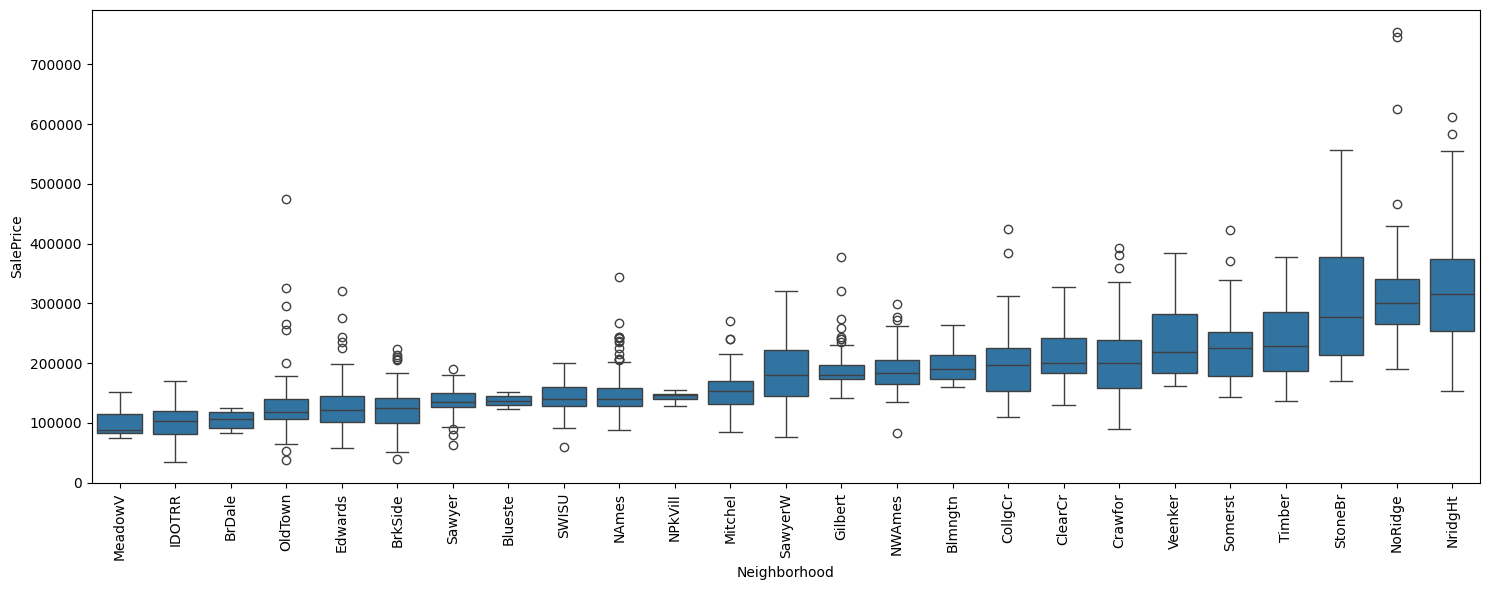

In [23]:
# part c)
import seaborn as sns
import matplotlib.pyplot as plt

med_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=True).index
med_order

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=med_order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Problem 3 (10 pts)
Here we'll show some of the houses on the map.

(a) Install the folium package with ``!pip install folium``.

(b) Suppose your manager at the yellow website fromtheowner.com wants you to make a webpage showing houses on sale. Create the interactive map by using ``folium`` package to produce the map shown below for the 30 houses whose Id's and coordinates are given in **locations.csv**. When you click on any pin on the map, the box should show the Id and SalePrice of that house as shown in the map below. You can find the SalePrice information in **train.csv**, and it's connected to **locations.csv** by the common column **Id**. 

(Hint for folium usage: ChatGPT, Google, folium documentary...)

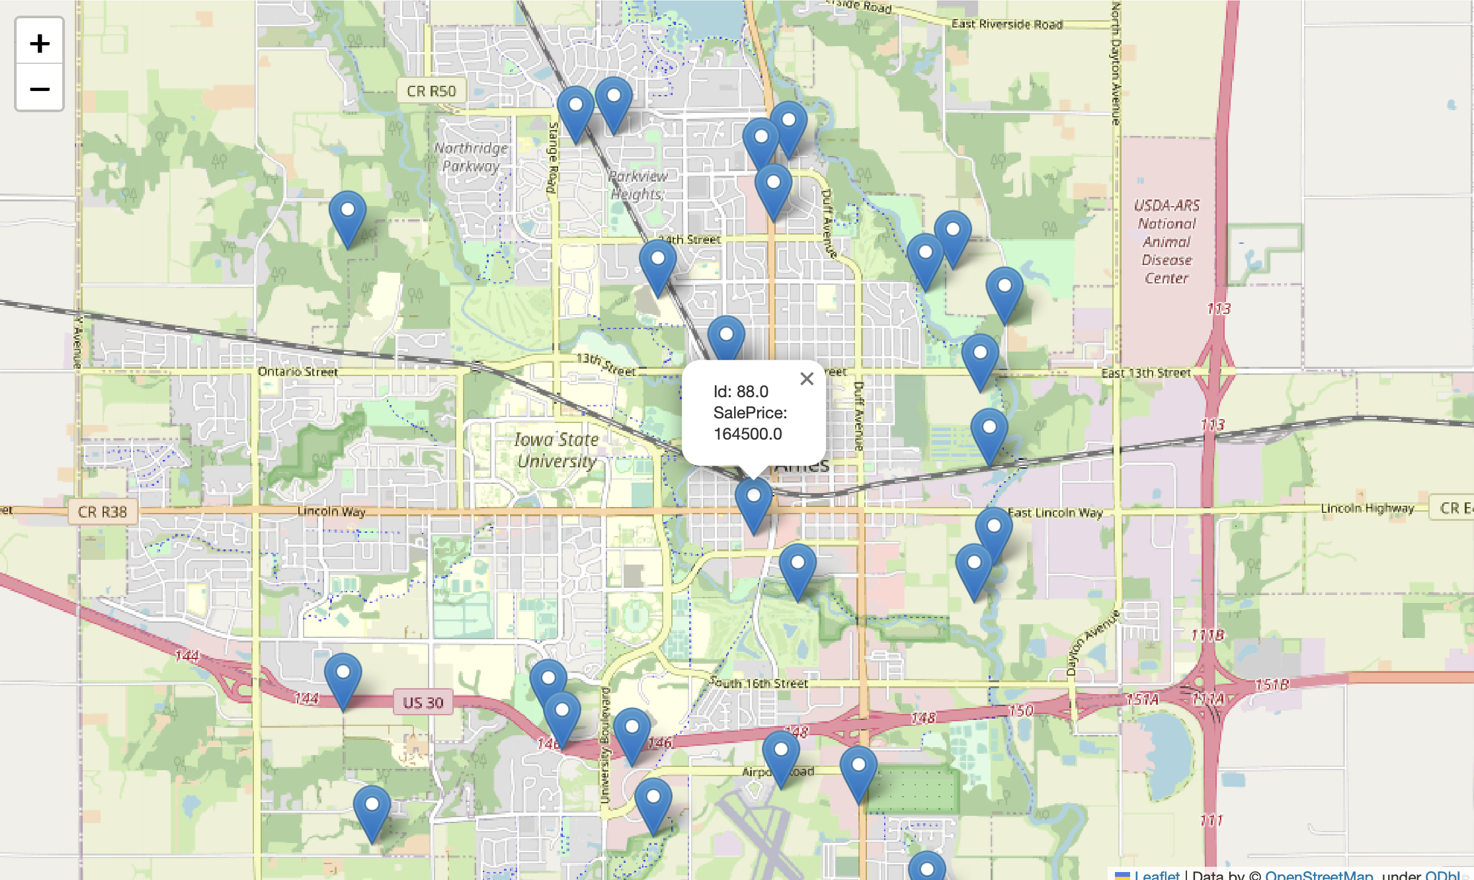




In [ ]:
# part a)
!pip3 install folium

In [ ]:
# part b)
import pandas as pd
import folium

locations = pd.read_csv('locations.csv')

df_map = locations.merge(df[['Id', 'SalePrice']], on='Id', how='inner')

map_center = [df_map['Latitude'].mean(), df_map['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

for idx, row in df_map.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Id: {row['Id']}<br>SalePrice: ${row['SalePrice']:,.0f}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)

In [30]:
m

## Problem 4 (10 pts)

(a) Load the data from **Electric_Vehicle_Population_Data.csv** into a dataframe `df`. Show the first five records (don't run `df` to show all records; jupyter notebook crashes as the data has 150482 rows).

(b) Make `df2` where it only includes the records whose **Electric Vehicle Type** is 'Battery Electric Vehicle (BEV)' and **Electric Range** is greater than zero. (There should be ~47000 records satisfying these conditions; check the length of your final dataframe before proceeding!).

(c) Use `df2`to plot the histrogram of the column **Electric Range**

(d) Use `df2`to create three boxplots as we did in the class for Electric Range in the y-axis and 'Model Year', 'Make' and 'Model' categories in the x-axis. Use sns library and set ``col_wrap=1, sharex=False, sharey=False, height=10`` so that we don't get two or more boxplots side by side. Your plots should look like this (I put them side by side to save space here; yours will be stacked vertically in the Jupyter notebook):

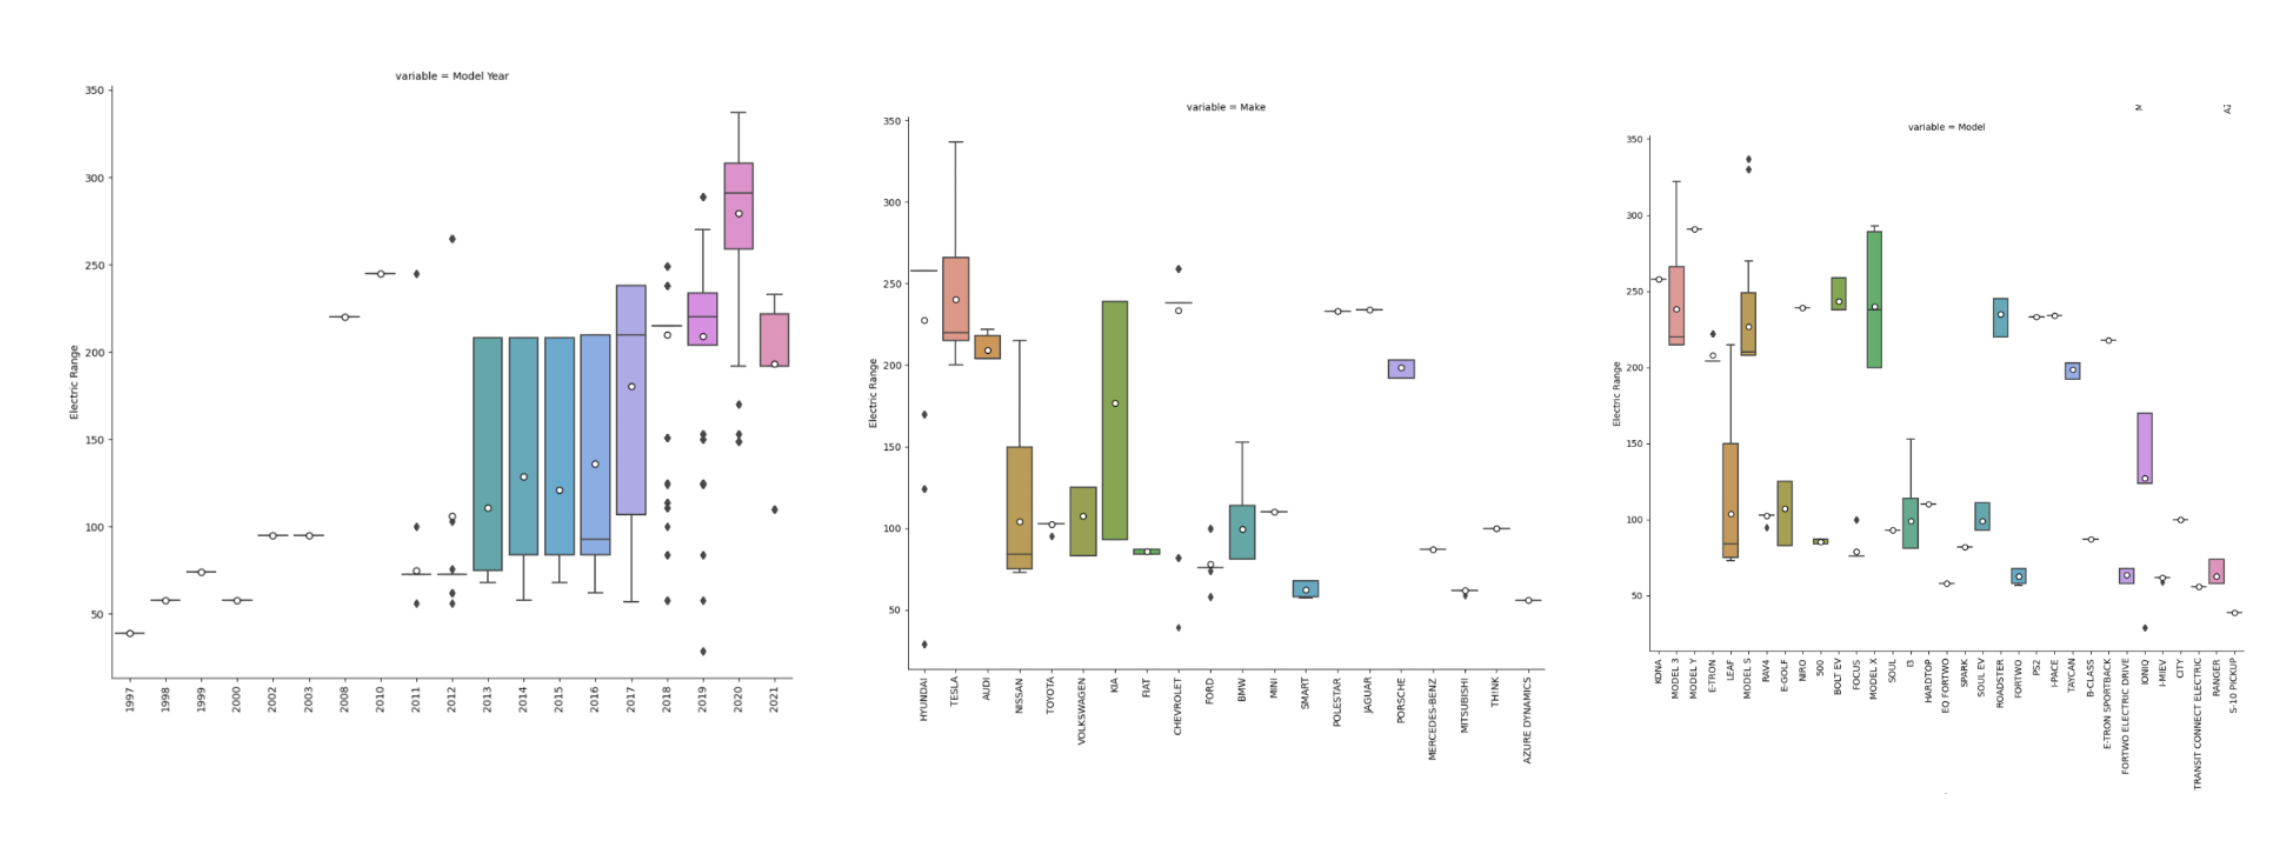


(e) "What story do these boxplots convey?" To answer this question, write at least two observations for each of the three boxplots (in total at least six observations). 

(f) Based on the box plots, does any of 'Model Year', 'Make' and 'Model' not determine the **Electric Range**, or do all of these determine it?

In [31]:
# part a)
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head(5)

,County,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,King,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),258
1,King,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),25
2,Yakima,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),25
3,King,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215
4,Thurston,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),97


In [35]:
# part b)
df2 = df[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Electric Range'] > 0)]

<Axes: xlabel='Electric Range', ylabel='Count'>

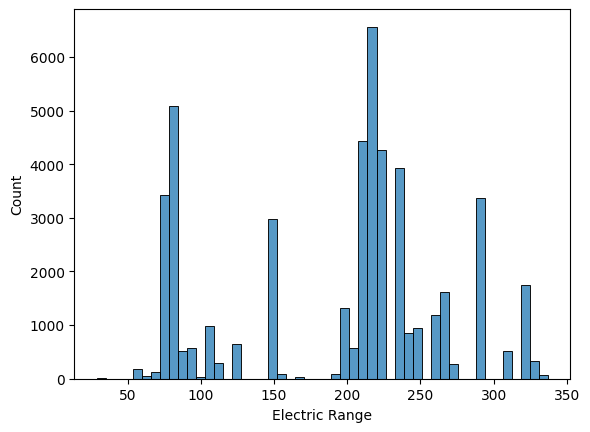

In [36]:
# part c)
sns.histplot(data=df2, x='Electric Range')

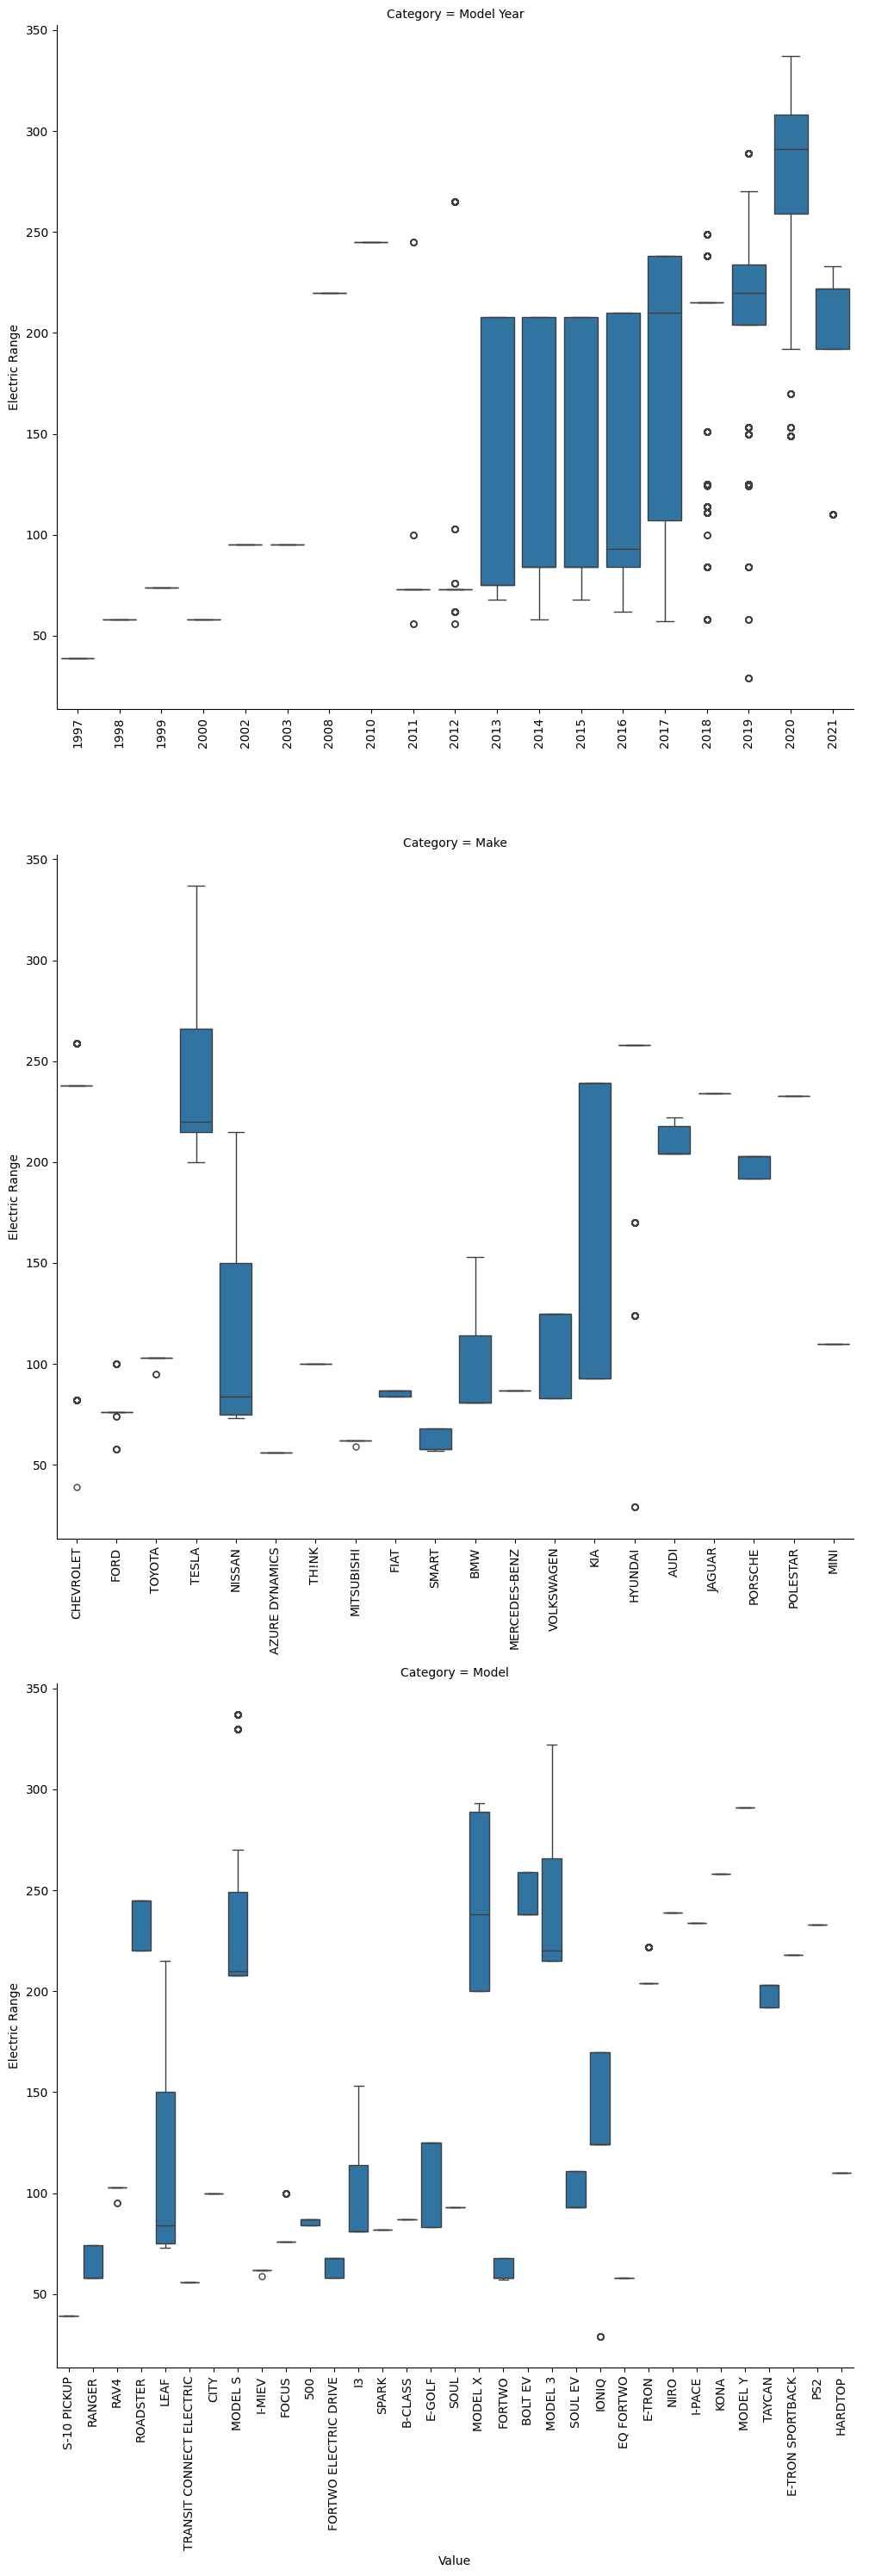

In [50]:
df_melted = df2.sort_values('Model Year', ascending=True).melt(id_vars=['Electric Range'], 
                     value_vars=['Model Year', 'Make', 'Model'],
                     var_name='Category', 
                     value_name='Value')

g = sns.catplot(
    data=df_melted,
    y='Electric Range',
    x='Value',
    kind='box',
    col='Category',
    col_wrap=1,
    height=10,
    sharex=False,
    sharey=False
)

g.set_xticklabels(rotation=90)
g.figure.tight_layout()
plt.show()

In [57]:
df2[df2['Make'] == 'CHEVROLET']['Model'].unique()

array(['BOLT EV', 'SPARK', 'S-10 PICKUP'], dtype=object)

In [61]:
df2[df2['Make'] == 'MERCEDES-BENZ']['Model'].unique()

array(['B-CLASS'], dtype=object)

# part e)

For Category = Model Year
1) Between 1997-2012, Electric Range median ranges around 50-100 and in the recent years starting from 2017 we can observe a significant upward trend, likely representing technological advancements in the car industry.
2) Starting from 2013, it is possible to observe that the variety of electric range is also increased, offering more wide of car choices, likely for different budget options such as low-end, mid, and high-end.

For Category = Make
1) KIA offers the most diverse cars in terms of electric range, likely for different budget options.
2) Tesla offers the highest electric range in the plot but only a few exclusive models can reach there, apart from that it offers similar electric range similar to Chevrolet, Hyundai, Jaguar, and Polestar.

For Category = Model
1) Although Chevrolet electric range median is in between 225-250, we can observe that there's a significant different across its models, S-10 PICKUP is below 50, SPARK is in between 50-100, and BOLT EV reaches around ~250, indicating car model can be a strong indicator for electric range. 
2) If we divide this plot into two clusters as low-end and high-end, it can be interpreted that below 200 cluster is aimed for the lower range and upper 200 cluster is aimed for the higher range. Only LEAF model is a bridge across them with a few exclusive cars.


# part f)
Based on all of these plots we can understand the story for electric range. 

For model year, there's a clear upward trend indicating recent models will most likely have a higher electric range compared to older models.

For brands (Make), some premium brands like Tesla and Chevrolet will be a strong indicator that they produce higher end cars in terms of electric range.

Models can be a stronger indicator than brands (Make) because as it can be observed that brands like Chevrolet and Hyundai produce in different segments. Models carry this information better as Chevrolet BOLT EV can reach ~250 but Chevrolet S10 PICKUP is below 50. However, in the Category = Make plot this information cannot be read clearly.